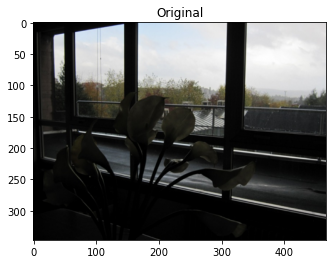

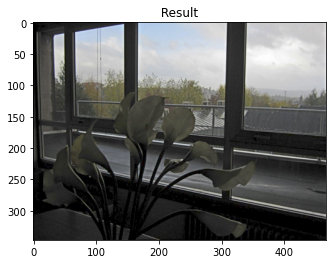

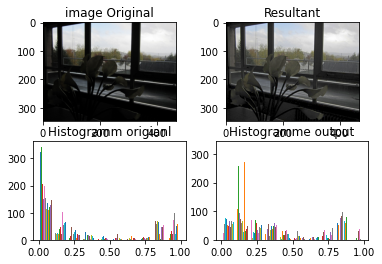

In [4]:
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from numpy import pi
import cv2


def RGBLCC(image):
    I = np.float64(image)/255.0
    plt.figure()
    plt.imshow(I)
    plt.title('Original')

    Red = I[:,:,0]
    Green = I[:,:,1]
    Blue = I[:,:,2]

    DFT2d_RED = np.fft.fft2(Red)
    DFT2d_Green = np.fft.fft2(Green)
    DFT2d_Blue = np.fft.fft2(Blue)
    [M , N, C] = I.shape

    sigma=2
    Nc = np.fft.ifftshift(list(range(int(-np.fix(M/2)),int(np.ceil(M/2)))))
    Nr = np.fft.ifftshift(list(range(int(-np.fix(N/2)),int(np.ceil(N/2)))))

    Nc, Nr = np.meshgrid (Nc, Nr)
    dft_gauss_kernel = np.exp(-2*(sigma**2)*(pi**2)*((Nr/M)**2+(Nc/N)**2))

    DFT2d_Red_convolved = DFT2d_RED * np.matlib.repmat(dft_gauss_kernel,1,1).T
    DFT2d_Green_convolved=DFT2d_Green * np.matlib.repmat(dft_gauss_kernel,1,1).T
    DFT2d_Blue_convolved=DFT2d_Blue * np.matlib.repmat(dft_gauss_kernel,1,1).T

    Red_convolved = np.fft.ifft2(DFT2d_Red_convolved)
    MRed = np.real(Red_convolved)
    Green_convolved = np.fft.ifft2(DFT2d_Green_convolved)
    MGreen = np.real(Green_convolved)
    Blue_convolved = np.fft.ifft2(DFT2d_Blue_convolved)
    MBlue = np.real(Green_convolved)

    output = np.zeros((M,N,3))
    for i in range(M):
        for j in range(N):     
            output[i,j,0]=(Red[i,j])**(2**(2*MRed[i,j]-1))
            output[i,j,1]=(Green[i,j])**(2**(2*MGreen[i,j]-1))
            output[i,j,2]=(Blue[i,j])**(2**(2*MBlue[i,j]-1))

    plt.figure() 
    plt.imshow(output)
    plt.title ( ' Result ' )

    plt.figure() 
    plt.subplot(2,2,1)
    plt.imshow(I)
    plt.title('image Original')
    plt.subplot(2,2,2)
    plt.imshow(output), 
    plt.title('Resultant')
    plt.subplot(2,2,3)
    plt.hist(np.mean(I,2))
    plt.title('Histogramm origianl')
    plt.subplot(2,2,4)
    plt.hist(np.mean(output,2))
    plt.title('Histogramme output')
    
img = cv2.imread('input_1.PNG')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBLCC(img_rgb)